In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x21cc18e7990>,
 'caps': [<matplotlib.lines.Line2D at 0x21ca97e2bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cc1af9910>],
 'medians': [<matplotlib.lines.Line2D at 0x21cc1b34250>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cc1b34d50>],
 'means': []}

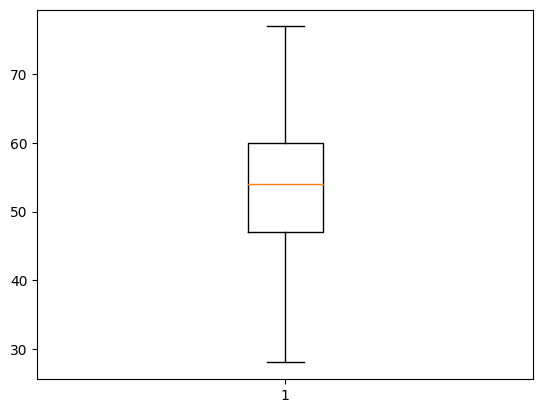

In [8]:
plt.boxplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

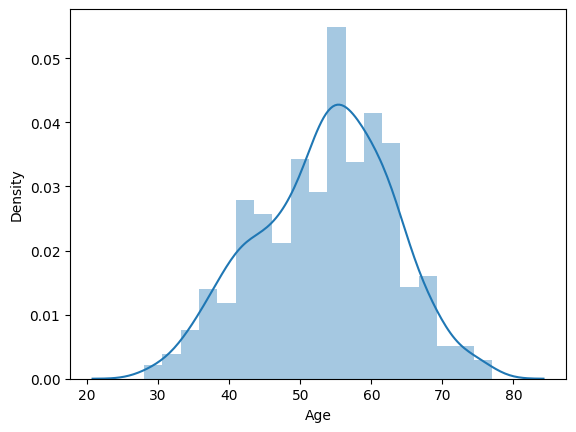

In [9]:
sns.distplot(df['Age'])

In [10]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [11]:
def category(x):
    if x<=30: 
        return 'Under 30'
    elif x>30 and x<=40:
        return 'Under 40'
    elif x>40 and x<=50:
        return 'Under 50'
    elif x>50 and x<=60:
        return 'Under 60'
    elif x>60 and x<=70:
        return 'Under 70'
    else:
        return 'Above 70'

In [12]:
df['C_Age']=df['Age'].apply(category)

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,C_Age
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Under 40
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Under 50
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Under 40
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Under 50
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Under 60


<Axes: xlabel='C_Age', ylabel='count'>

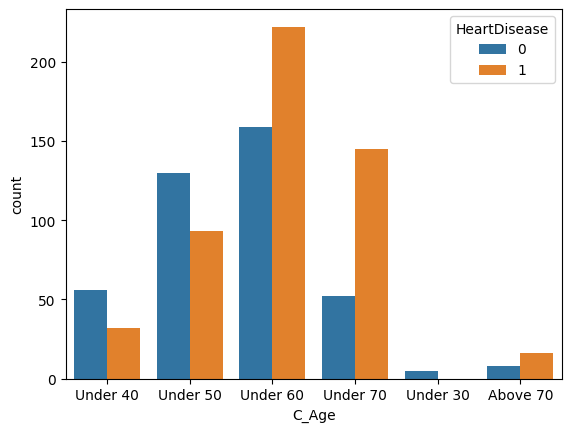

In [14]:
sns.countplot(data=df, x="C_Age", hue="HeartDisease")



In [15]:
df['C_Age'].value_counts()

C_Age
Under 60    381
Under 50    223
Under 70    197
Under 40     88
Above 70     24
Under 30      5
Name: count, dtype: int64

In [16]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

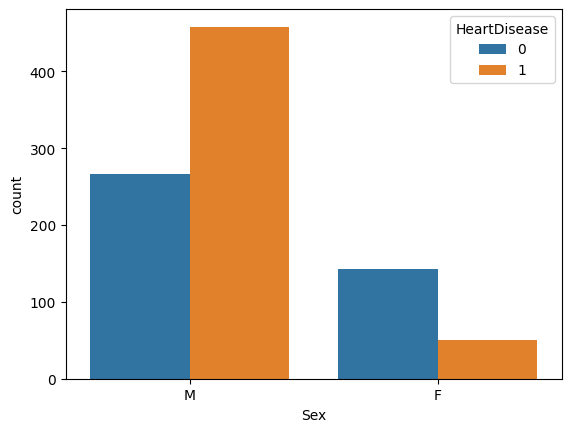

In [17]:
sns.countplot(data=df, x="Sex", hue="HeartDisease")


In [18]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

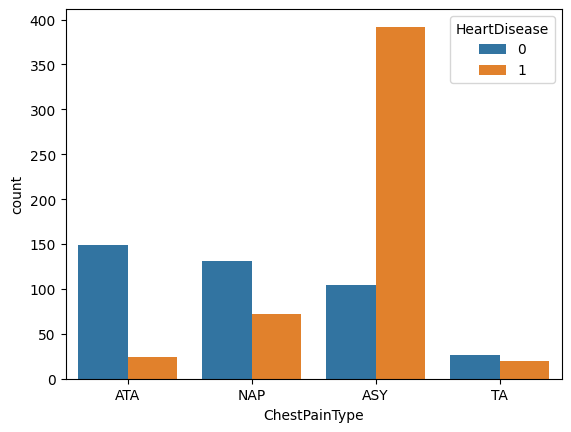

In [19]:
sns.countplot(data=df, x='ChestPainType',hue='HeartDisease')

In [20]:
def detailed(age_category):
    filtered_df = df[df['C_Age'] == age_category]

    chest_pain_counts = filtered_df['ChestPainType'].value_counts()

    # Display the result
    print('Typical Angina : ', chest_pain_counts.get('TA', 0))
    print('Atypical Angina : ', chest_pain_counts.get('ATA', 0))
    print('Non-Anginal Pain : ', chest_pain_counts.get('NAP', 0))
    print('Asymptomatic : ', chest_pain_counts.get('ASY', 0))



In [21]:
detailed('Under 30')

Typical Angina :  1
Atypical Angina :  4
Non-Anginal Pain :  0
Asymptomatic :  0


In [22]:
detailed('Under 40')

Typical Angina :  6
Atypical Angina :  25
Non-Anginal Pain :  24
Asymptomatic :  33


In [23]:
detailed('Under 50')

Typical Angina :  7
Atypical Angina :  57
Non-Anginal Pain :  50
Asymptomatic :  109


In [24]:
detailed('Under 60')

Typical Angina :  13
Atypical Angina :  71
Non-Anginal Pain :  84
Asymptomatic :  213


In [25]:
detailed('Under 70')

Typical Angina :  18
Atypical Angina :  13
Non-Anginal Pain :  36
Asymptomatic :  130


<Axes: >

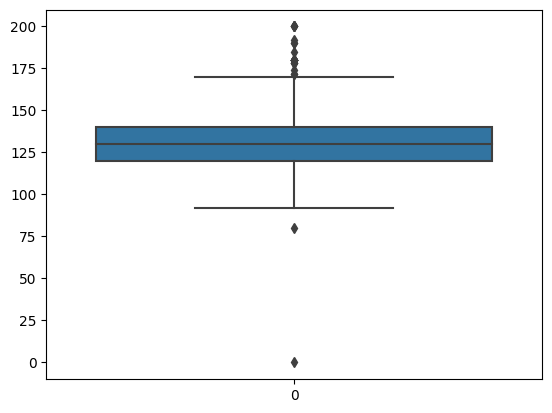

In [26]:
sns.boxplot(df['RestingBP'])

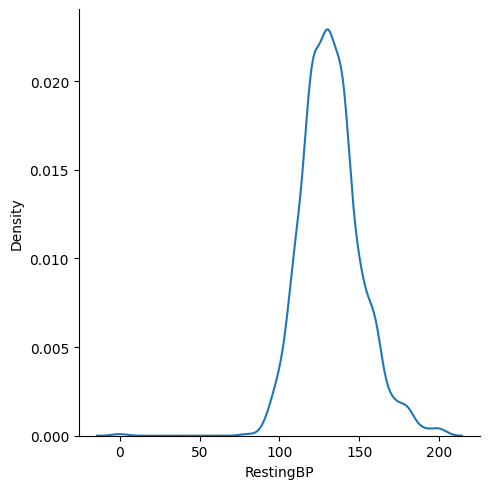

In [27]:
sns.displot(df['RestingBP'],kind='kde')

In [28]:
quantile_25=df['RestingBP'].quantile(0.25)
quantile_75=df['RestingBP'].quantile(0.75)
iqr=quantile_75-quantile_25
upper_limit=quantile_75+1.5*iqr
lower_limit=quantile_25-1.5*iqr
def out(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value

In [29]:
df['RestingBP']=df['RestingBP'].apply(out)

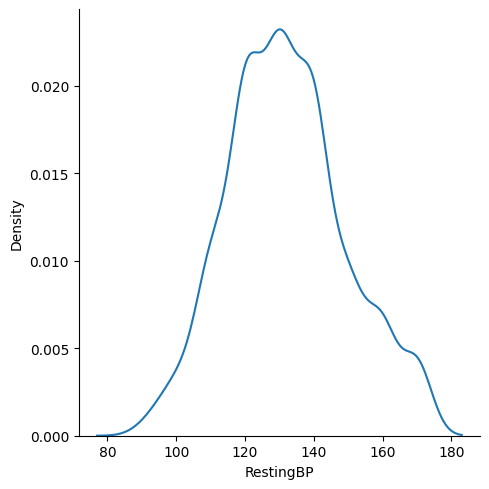

In [30]:
sns.displot(df['RestingBP'],kind='kde')

In [31]:
df['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 135., 108., 155.,
       128., 106.,  92., 122.,  98., 105., 133.,  95.,  90., 137., 165.,
       126., 152., 116., 144., 154., 134., 104., 139., 131., 141., 146.,
       158., 123., 102.,  96., 143., 156., 114., 127., 101.,  94., 148.,
       117., 129., 164.])

In [32]:
def category_BP(x):
    if x<=90: 
        return 'Low'
    elif x>101 and x<=120:
        return 'Normal'
    elif x>121 and x<=140:
        return 'Elevated'
    else:
        return 'High'

In [33]:
df['C_RestingBP']=df['RestingBP'].apply(category_BP)

In [34]:
df['C_RestingBP'].value_counts()

C_RestingBP
Elevated    405
Normal      264
High        247
Low           2
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Elevated'),
  Text(1, 0, 'High'),
  Text(2, 0, 'Normal'),
  Text(3, 0, 'Low')])

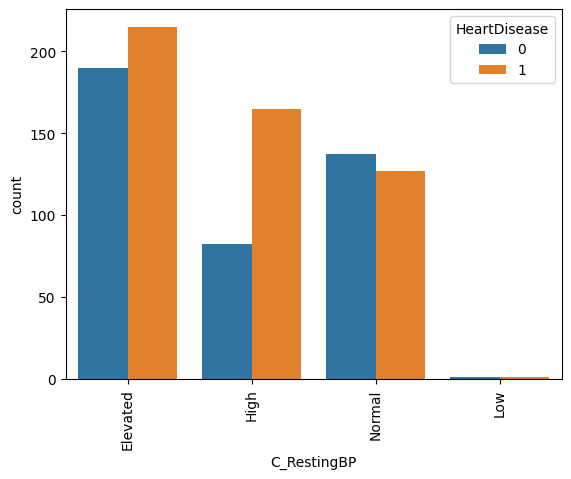

In [35]:
sns.countplot(data=df, x='C_RestingBP',hue='HeartDisease')
plt.xticks(rotation=90)

In [36]:
def Age_BP():
    bp_ranges=['Low','Normal','Elevated','High']
    for i in bp_ranges:
        x=df[df['C_RestingBP']==i]
        counts=x['C_Age'].value_counts().sort_index()
        labels=counts.index.map(str)
        count=counts.values
        print(i)
        print('Above 70 : ', counts.get('Above 70', 0))
        print('Under 70 : ', counts.get('Under 70', 0))
        print('Under 60 : ', counts.get('Under 60', 0))
        print('Under 50 : ', counts.get('Under 50', 0))
        print('Under 40 : ', counts.get('Under 40', 0))
        print('Under 30 : ', counts.get('Under 30', 0))
        print('=======================================================')

In [37]:
Age_BP()

Low
Above 70 :  0
Under 70 :  0
Under 60 :  2
Under 50 :  0
Under 40 :  0
Under 30 :  0
Normal
Above 70 :  5
Under 70 :  40
Under 60 :  86
Under 50 :  91
Under 40 :  41
Under 30 :  1
Elevated
Above 70 :  7
Under 70 :  79
Under 60 :  198
Under 50 :  88
Under 40 :  30
Under 30 :  3
High
Above 70 :  12
Under 70 :  78
Under 60 :  95
Under 50 :  44
Under 40 :  17
Under 30 :  1


In [38]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,C_Age,C_RestingBP
888,52,M,ASY,128.0,204,1,Normal,156,Y,1.0,Flat,1,Under 60,Elevated


<Axes: >

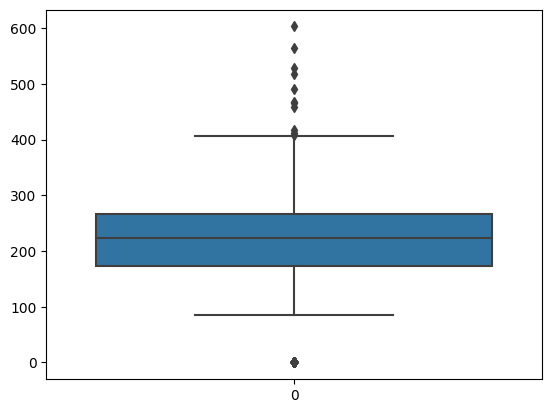

In [39]:
sns.boxplot(df['Cholesterol'])

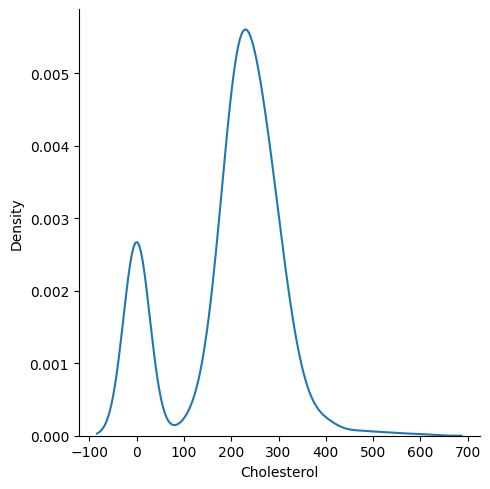

In [40]:
sns.displot(df['Cholesterol'],kind='kde')

In [41]:
quantile_25=df['Cholesterol'].quantile(0.25)
quantile_75=df['Cholesterol'].quantile(0.75)
iqr=quantile_75-quantile_25
upper_limit=quantile_75+1.5*iqr
lower_limit=quantile_25-1.5*iqr
def out(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value

In [42]:
df['Cholesterol']=df['Cholesterol'].apply(out)

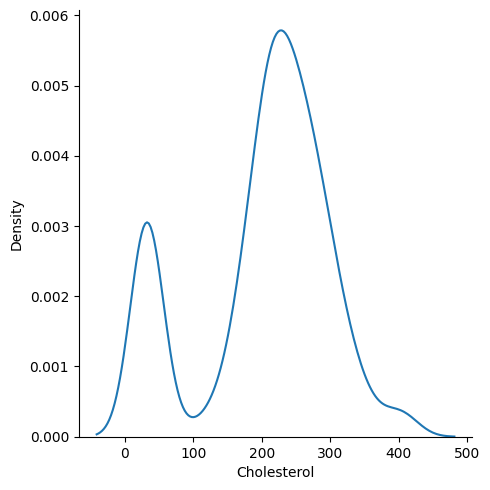

In [43]:
sns.displot(df['Cholesterol'],kind='kde')

In [44]:
def category_CH(x):
    if x<=120: 
        return 'Low'
    elif x>121 and x<=200:
        return 'Normal'
    elif x>201 and x<=239:
        return 'Elevated'
    else:
        return 'High'

In [45]:
df['C_Cholestrol']=df['Cholesterol'].apply(category_CH)

In [46]:
df['C_Cholestrol'].value_counts()

C_Cholestrol
High        369
Elevated    227
Low         178
Normal      144
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'High'),
  Text(1, 0, 'Normal'),
  Text(2, 0, 'Elevated'),
  Text(3, 0, 'Low')])

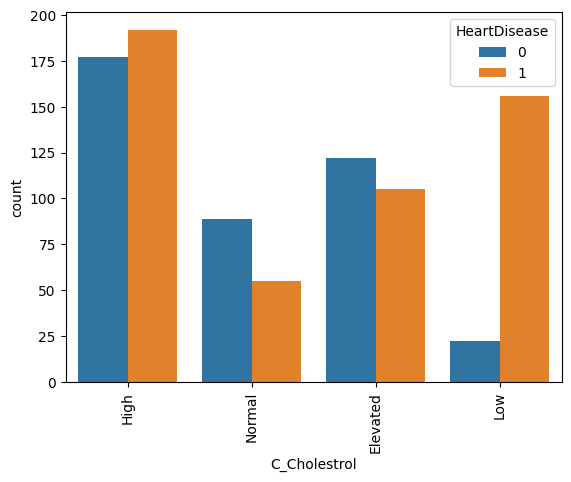

In [47]:
sns.countplot(data=df, x='C_Cholestrol',hue='HeartDisease')
plt.xticks(rotation=90)

In [48]:
def Age_CH():
    bp_ranges=['Low','High']
    for i in bp_ranges:
        x=df[df['C_Cholestrol']==i]
        counts=x['C_Age'].value_counts().sort_index()
        labels=counts.index.map(str)
        count=counts.values
        print(i)
        print('Above 70 : ', counts.get('Above 70', 0))
        print('Under 70 : ', counts.get('Under 70', 0))
        print('Under 60 : ', counts.get('Under 60', 0))
        print('Under 50 : ', counts.get('Under 50', 0))
        print('Under 40 : ', counts.get('Under 40', 0))
        print('Under 30 : ', counts.get('Under 30', 0))
        print('=======================================================')

In [49]:
Age_CH()

Low
Above 70 :  5
Under 70 :  58
Under 60 :  80
Under 50 :  22
Under 40 :  13
Under 30 :  0
High
Above 70 :  7
Under 70 :  81
Under 60 :  150
Under 50 :  95
Under 40 :  34
Under 30 :  2


In [50]:
df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

<Axes: xlabel='FastingBS', ylabel='count'>

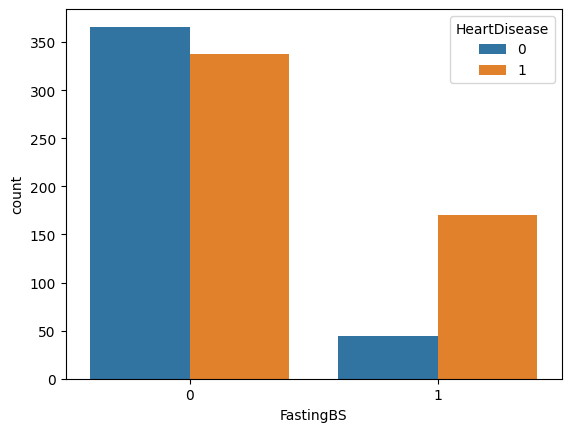

In [51]:
sns.countplot(data=df,x='FastingBS', hue='HeartDisease')

In [52]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,C_Age,C_RestingBP,C_Cholestrol
307,53,M,ATA,130.0,32.625,0,ST,120,N,0.7,Down,0,Under 60,Elevated,Low


In [53]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<Axes: xlabel='RestingECG', ylabel='count'>

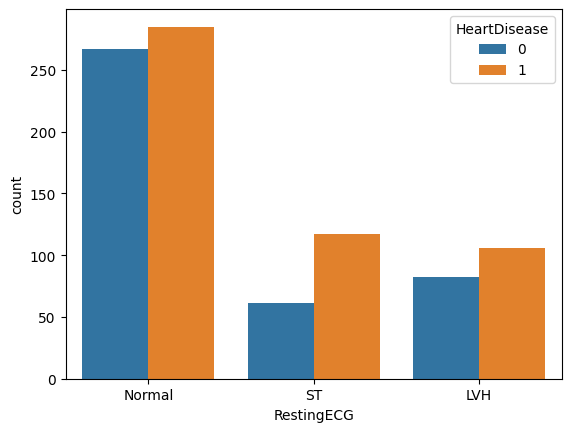

In [54]:
sns.countplot(data=df,x='RestingECG', hue='HeartDisease')

In [55]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,C_Age,C_RestingBP,C_Cholestrol
496,58,M,ASY,132.0,407.625,1,Normal,69,N,1.0,Down,0,Under 60,Elevated,High


<Axes: >

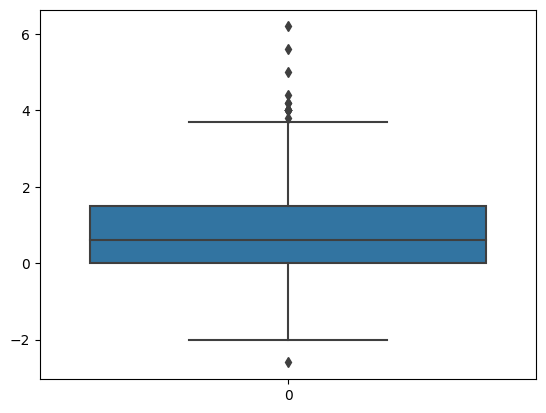

In [56]:
sns.boxplot(df['Oldpeak'])

In [57]:
quantile_25=df['Oldpeak'].quantile(0.25)
quantile_75=df['Oldpeak'].quantile(0.75)
iqr=quantile_75-quantile_25
upper_limit=quantile_75+1.5*iqr
lower_limit=quantile_25-1.5*iqr
def out(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value

In [58]:
df['Oldpeak']=df['Oldpeak'].apply(out)

<Axes: xlabel='Oldpeak', ylabel='Density'>

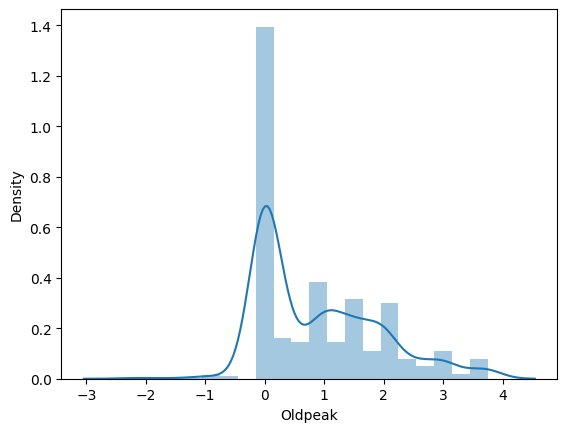

In [59]:
sns.distplot((df['Oldpeak']))

<Axes: xlabel='MaxHR', ylabel='Density'>

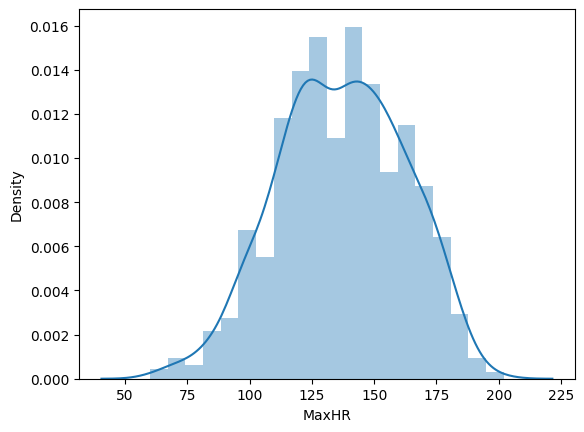

In [60]:
sns.distplot(df['MaxHR'])

In [61]:
df['HeartDisease'].corr(df['Age'])


0.2820385058189974

In [62]:
from scipy.stats import f_oneway

category_column=df.groupby('C_Age')['HeartDisease'].apply(list)
anova_result=f_oneway(*category_column)

print(anova_result[1])


4.24435190022381e-13


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  C_Age           918 non-null    object 
 13  C_RestingBP     918 non-null    object 
 14  C_Cholestrol    918 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 107.7+ KB


In [64]:
numerical=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','C_Age','C_RestingBP','C_Cholestrol']

In [65]:
from scipy.stats import f_oneway
for i in categorical:

    category_column=df.groupby(i)['HeartDisease'].apply(list)
    anova_result=f_oneway(*category_column)
    if anova_result[1]<0.05:
        print(i, '- Dependent -',anova_result[1])
    else:
        print(i, '- Independent - ',anova_result[1] )

Sex - Dependent - 2.821897823682476e-21
ChestPainType - Dependent - 3.787751475195533e-68
RestingECG - Dependent - 0.0041669579133269035
ExerciseAngina - Dependent - 1.0130182683914683e-57
ST_Slope - Dependent - 3.409331733350609e-98
C_Age - Dependent - 4.24435190022381e-13
C_RestingBP - Dependent - 0.00019491541822129366
C_Cholestrol - Dependent - 4.545953720787921e-23


In [66]:
df_new=df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']]

<Axes: >

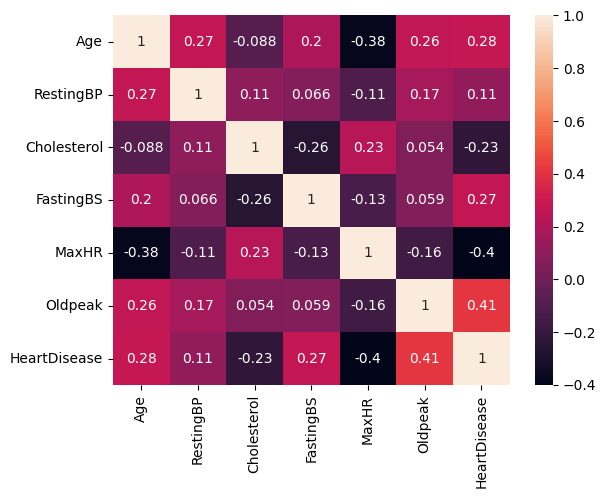

In [67]:
correlation_matrix = df_new.corr()
sns.heatmap(correlation_matrix,annot=True)


In [68]:
df_training=df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','C_Age','C_RestingBP','C_Cholestrol','FastingBS','MaxHR','Oldpeak','HeartDisease']]

In [69]:
df_training.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,C_Age,C_RestingBP,C_Cholestrol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,M,ATA,Normal,N,Up,Under 40,Elevated,High,0,172,0.0,0
1,F,NAP,Normal,N,Flat,Under 50,High,Normal,0,156,1.0,1
2,M,ATA,ST,N,Up,Under 40,Elevated,High,0,98,0.0,0
3,F,ASY,Normal,Y,Flat,Under 50,Elevated,Elevated,0,108,1.5,1
4,M,NAP,Normal,N,Up,Under 60,High,Normal,0,122,0.0,0


In [70]:
x=df_training.iloc[:,:-1]
y=df_training.iloc[:,-1]

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [72]:
x_train

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,C_Age,C_RestingBP,C_Cholestrol,FastingBS,MaxHR,Oldpeak
795,M,NAP,Normal,N,Down,Under 50,Normal,High,1,194,0.8
25,M,NAP,Normal,N,Up,Under 40,Elevated,Elevated,0,178,0.0
84,M,ASY,Normal,Y,Flat,Under 60,High,Elevated,1,125,1.0
10,F,NAP,Normal,N,Up,Under 40,Elevated,Elevated,0,142,0.0
344,M,ASY,Normal,N,Flat,Under 60,Normal,Low,1,104,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,F,ASY,ST,N,Up,Under 50,Normal,High,0,110,0.0
270,M,ASY,Normal,N,Up,Under 50,Normal,Elevated,0,140,0.0
860,M,ASY,Normal,Y,Up,Under 60,Elevated,High,0,144,1.4
435,M,ASY,ST,Y,Up,Under 60,High,Low,0,118,0.0


In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first'), ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'C_Age']),
    ('tnf2', OrdinalEncoder(categories=[[ 'Low','Normal','Elevated','High'], ['Low','Normal','Elevated','High']]), ['C_RestingBP', 'C_Cholestrol']),
    ('tnf3', StandardScaler(), ['MaxHR', 'Oldpeak'])
], remainder='passthrough')

In [74]:
x_train_t=transformer.fit_transform(x_train)
x_test_t=transformer.transform(x_test)

In [75]:
x_train_t[0]

array([ 1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        3.        ,  2.28435288, -0.08977599,  1.        ])

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,ConfusionMatrixDisplay

0.8369565217391305
0.8411214953271028


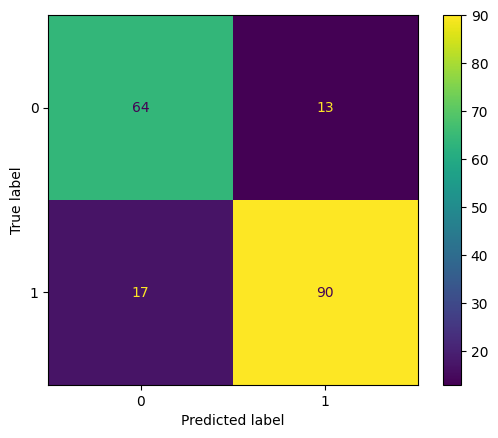

In [98]:
from sklearn.naive_bayes import BernoulliNB
bb=BernoulliNB()
bb.fit(x_train_t,y_train)
pred=bb.predict(x_test_t)
print(accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(recall_score(y_test,pred))


0.8532608695652174
0.8504672897196262


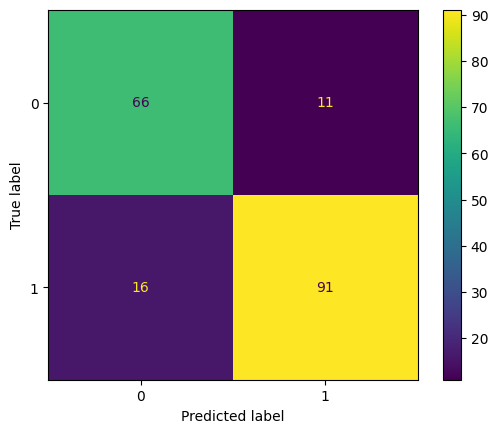

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_t,y_train)
pred=lr.predict(x_test_t)
print(accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(recall_score(y_test,pred))

Accuracy_score 0.8532608695652174
Recall_score 0.897196261682243


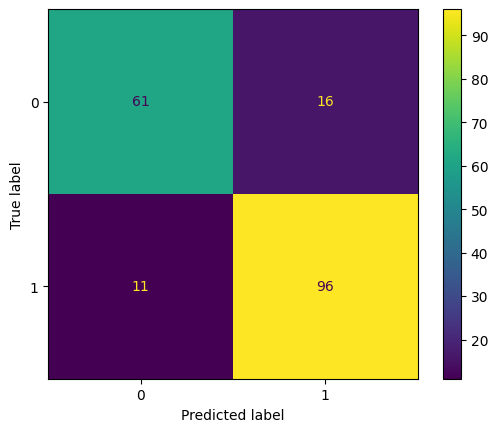

In [90]:
from sklearn.svm import SVC
svc=SVC(C=1,kernel='rbf',gamma=0.9)
svc.fit(x_train_t,y_train)
pred=svc.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))

Accuracy_score 0.875
Recall_score 0.897196261682243


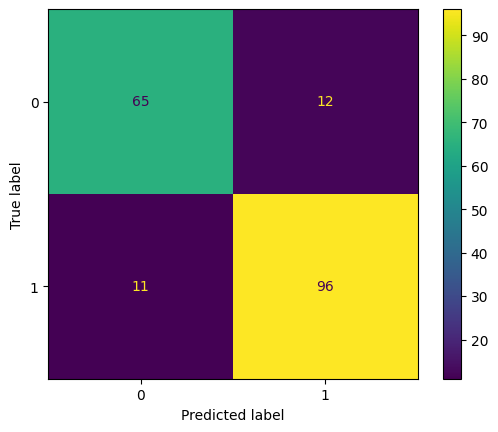

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
ext=ExtraTreesClassifier(n_estimators=220,criterion='entropy',max_depth=7)
ext.fit(x_train_t,y_train)
pred=ext.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))

Accuracy_score 0.8641304347826086
Recall_score 0.8785046728971962


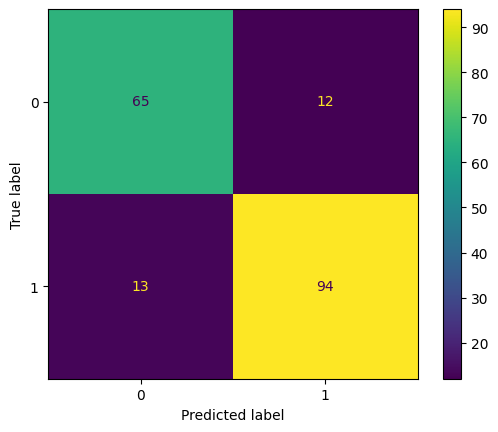

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='best')
dt.fit(x_train_t,y_train)
pred=dt.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))

Accuracy_score 0.8641304347826086
Recall_score 0.8878504672897196


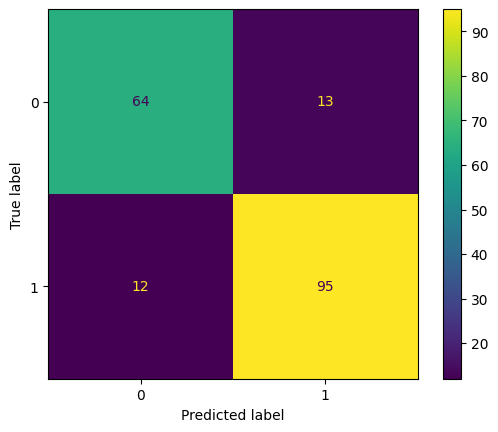

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=220,criterion='entropy',max_depth=7,oob_score=True,random_state=42)
rf.fit(x_train_t,y_train)
pred=rf.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))

Accuracy_score 0.8478260869565217
Recall_score 0.8691588785046729


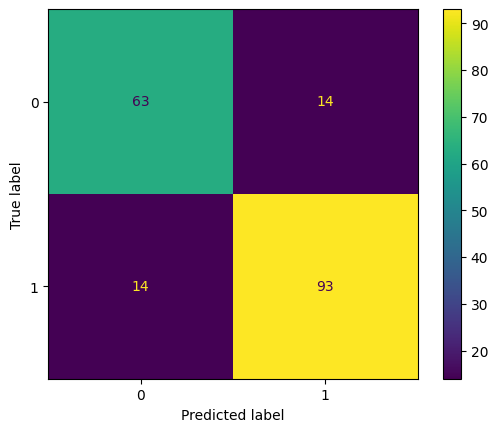

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_t,y_train)
pred=knn.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))

Accuracy_score 0.8586956521739131
Recall_score 0.8785046728971962


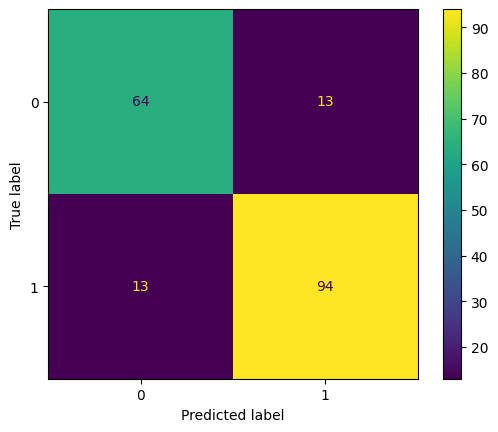

In [83]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(
    DecisionTreeClassifier(max_depth=10),n_estimators=200,max_features=0.7,max_samples=1.0,bootstrap=True,n_jobs=-1
)
bg.fit(x_train_t,y_train)
pred=bg.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))


Accuracy_score 0.8586956521739131
Recall_score 0.8691588785046729


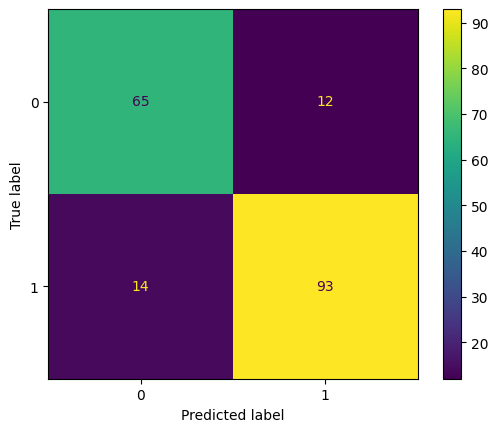

In [84]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
estimators=[
    ('rf',RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=7)),
    ('bg',BaggingClassifier(SVC(C=1,kernel='rbf',gamma=0.5),n_estimators=150,max_samples=200,bootstrap=True,n_jobs=-1)),
    ('gbc',GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,random_state=100 )),
    ('ext',ExtraTreesClassifier(n_estimators=220,criterion='entropy',max_depth=7))
]
stc=StackingClassifier(
    estimators=estimators,final_estimator=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=7 ),cv=50
)
stc.fit(x_train_t,y_train)
pred=stc.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))


Accuracy_score 0.875
Recall_score 0.8878504672897196


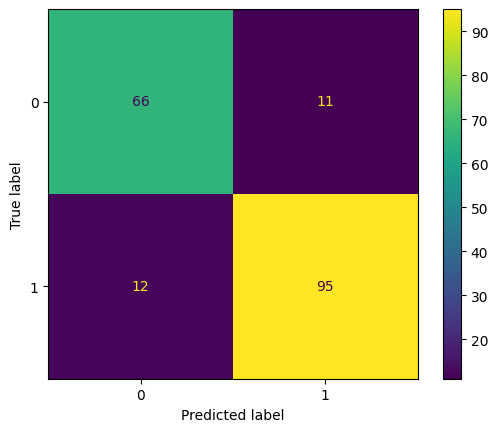

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,random_state=100,max_depth=3 )
gbc.fit(x_train_t,y_train)
pred=gbc.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))



Accuracy_score 0.875
Recall_score 0.8878504672897196


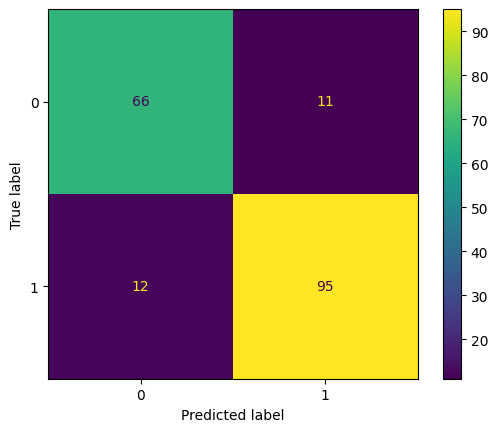

In [86]:
from sklearn.ensemble import VotingClassifier
estimators=[('dt',dt),('svc',SVC(kernel='sigmoid',gamma=1.0,probability=True)),('gbc',gbc),('etc',ext),('rf',rf)]
vc=VotingClassifier(estimators=estimators,voting= 'soft')
vc.fit(x_train_t,y_train)
pred=vc.predict(x_test_t)
print('Accuracy_score',accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print('Recall_score',recall_score(y_test,pred))

In [108]:
param_grid=[{'C':[0.01,0.1,5,1,10,100],'kernel':['linear']},
            {'C':[0.01,0.1,1,5,10,100],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8]},
            {'C':[0.01,0.1,1,5,10,100],'kernel':['polynomial'],'degree':[2,3,4,5,6]}]
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=svc,param_grid=param_grid,cv=200,n_jobs=-1)
grid_search=grid_search.fit(x_train_t,y_train)
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [116]:
dt.get_depth()


17

In [117]:
param_grid_dt=[{
    'criterion':['ginni','entropy'],
    'splitter':['best','random'],
    'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,16,17]
}]
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid_dt,cv=200,n_jobs=-1)
grid_search=grid_search.fit(x_train_t,y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}

In [193]:
param_grid_rf=[{
    'n_estimators':[50,100,150,200],
    'criterion':['ginni','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,16,17]
}]
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid_rf,cv=200,n_jobs=-1)
grid_search=grid_search.fit(x_train_t,y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50}

In [204]:
params = {'voting':['hard', 'soft'],
          'weights':[(1,1,1,1), (2,1,1,1), 
                     (1,2,1,1), (1,1,2,1),
                     (1,1,1,2), (1,2,2,1),
                     (2,1,1,2), (2,1,2,1),
                     (2,2,2,2),(2,1,2,2)]}
grid=GridSearchCV(estimator=vc,param_grid=params,cv=200,n_jobs=-1)
grid=grid.fit(x_train_t,y_train)
grid.best_params_

{'voting': 'hard', 'weights': (2, 1, 1, 1)}

In [298]:
grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}
grid_gb=GridSearchCV(estimator=gbc,param_grid=grid,cv=200,n_jobs=-1)
grid_gb=grid_gb.fit(x_train_t,y_train)
grid_gb.best_params_


{'learning_rate': 0.05, 'n_estimators': 200}

In [395]:
param_grid = {
    'base_estimator__max_depth': [None, 5, 10],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Use GridSearchCV for parameter tuning
grid_search = GridSearchCV(estimator=bg, param_grid=param_grid, cv=5)
grid_search.fit(x_train_t, y_train)
grid_search.best_params_

{'base_estimator__max_depth': 10,
 'max_features': 0.7,
 'max_samples': 1.0,
 'n_estimators': 200}